In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("golf2.txt")

In [3]:
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,85,85,Weak,No
1,Sunny,80,90,Strong,No
2,Overcast,83,78,Weak,Yes
3,Rain,70,96,Weak,Yes
4,Rain,68,80,Weak,Yes


In [4]:
target_name = 'Decision'

# Pre-processing

In [5]:
categorical_features = []
features_names = []

In [6]:
for col in df.columns:
    features_names.append(col)
    
    if df[col].dtype == 'object': #categorical features
        if col != target_name:
            categorical_features.append(col)
        else:
        #if True:
            unique_values =  df[col].unique()
            print(col," column has ",unique_values," classes")

            for j in range(0, len(unique_values)):
                idx = df[df[col] == unique_values[j]].index
                df.loc[idx, col] = j
                print(unique_values[j]," is transformed to ",(j))

Decision  column has  ['No' 'Yes']  classes
No  is transformed to  0
Yes  is transformed to  1


In [7]:
print("data set features: ", features_names)
print("categorical features in the data set: ", categorical_features)

data set features:  ['Outlook', 'Temp.', 'Humidity', 'Wind', 'Decision']
categorical features in the data set:  ['Outlook', 'Wind']


# One hot encoding for categorical features

In [8]:
for column in categorical_features:
    unique_values = df[column].unique()
    one_hot = pd.get_dummies(unique_values, prefix=column)
    one_hot[column] = unique_values
    
    df = df.merge(one_hot, left_on = [column], right_on=[column], how="left")
    df = df.drop(columns = [column])

In [9]:
df.head()

,Temp.,Humidity,Decision,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,85,85,0,0,0,1,0,1
1,80,90,0,0,0,1,1,0
2,83,78,1,1,0,0,0,1
3,70,96,1,0,1,0,0,1
4,68,80,1,0,1,0,0,1


# Modelling

In [10]:
import xgboost

In [11]:
enableRegression = False #classification or regression

In [12]:
if enableRegression:
    objective = 'rmse'
    eval_metric = 'rmse'
else:
    eval_metric = 'logloss'
    if len(df[target_name].unique()) == 2:
        objective = 'binary:logistic'
    else:
        objective = 'multi:softmax'

In [13]:
params = {
    'learning_rate': 0.01
    , 'max_depth': 5
    , 'min_child_weight': 0.5
    , 'n_estimators': 250
    , 'seed': 17
    , 'nthread':  2
    , 'object':  objective
    #, 'num_classes':  len(df[target_name].unique())
}

In [14]:
if enableRegression:
    model = xgboost.XGBRegressor(**params)
else:
    model = xgboost.XGBClassifier(**params)

In [15]:
eval_set = [(df.drop(columns=[target_name]), df[target_name])]

In [16]:
model.fit(df.drop(columns=[target_name]), df[target_name]
         , eval_metric=eval_metric
          , eval_set=eval_set, early_stopping_rounds=5, verbose=True
         )

[0]	validation_0-logloss:0.688826
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.686785
[2]	validation_0-logloss:0.684757
[3]	validation_0-logloss:0.682745
[4]	validation_0-logloss:0.680755
[5]	validation_0-logloss:0.678762
[6]	validation_0-logloss:0.6768
[7]	validation_0-logloss:0.67486
[8]	validation_0-logloss:0.672186
[9]	validation_0-logloss:0.669522
[10]	validation_0-logloss:0.667589
[11]	validation_0-logloss:0.665677
[12]	validation_0-logloss:0.663796
[13]	validation_0-logloss:0.66119
[14]	validation_0-logloss:0.658606
[15]	validation_0-logloss:0.656743
[16]	validation_0-logloss:0.654912
[17]	validation_0-logloss:0.652374
[18]	validation_0-logloss:0.649856
[19]	validation_0-logloss:0.648041
[20]	validation_0-logloss:0.646258
[21]	validation_0-logloss:0.643786
[22]	validation_0-logloss:0.64133
[23]	validation_0-logloss:0.639557
[24]	validation_0-logloss:0.637804
[25]	validation_0-logloss:0.635383
[26]	validation_0-logloss:0.633653
[27

[230]	validation_0-logloss:0.378859
[231]	validation_0-logloss:0.37791
[232]	validation_0-logloss:0.377299
[233]	validation_0-logloss:0.376358
[234]	validation_0-logloss:0.376017
[235]	validation_0-logloss:0.375412
[236]	validation_0-logloss:0.374478
[237]	validation_0-logloss:0.374142
[238]	validation_0-logloss:0.373543
[239]	validation_0-logloss:0.372632
[240]	validation_0-logloss:0.371711
[241]	validation_0-logloss:0.370797
[242]	validation_0-logloss:0.370467
[243]	validation_0-logloss:0.369875
[244]	validation_0-logloss:0.368966
[245]	validation_0-logloss:0.36864
[246]	validation_0-logloss:0.367779
[247]	validation_0-logloss:0.366925
[248]	validation_0-logloss:0.366604
[249]	validation_0-logloss:0.365726


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=5, min_child_weight=0.5, missing=None,
       n_estimators=250, n_jobs=1, nthread=2, object='binary:logistic',
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=17, silent=None, subsample=1,
       verbosity=1)

In [18]:
from xgboost import plot_importance

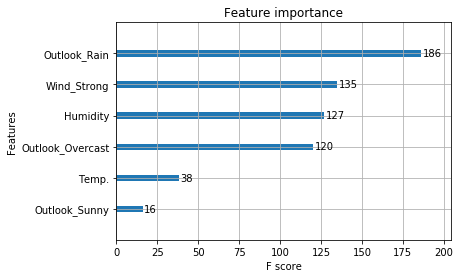

In [20]:
plot_importance(model)

# Predictions

In [21]:
predictions = model.predict(df.drop(columns=[target_name]))

C:\Users\IS96273\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
actuals = df[target_name].values

In [23]:
actuals

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [24]:
predictions

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [25]:
mae = 0

for i in range(0, len(predictions)):
    prediction = predictions[i]
    actual = actuals[i]
    
    if enableRegression:
        error = abs(actual - prediction)
        mae += error
        print("Prediction is ", prediction," whereas actual was ", actual," (Error: ",error,")")
    else:
        print("Prediction is ", prediction," whereas actual was ", actual, end ='')

        if actual == prediction:
            print(" (CLASSIFIED)")
        else:
            print(" (UNCLASSIFIED)")

if enableRegression:
    mae = mae / len(predictions)
    print("MAE: ", mae)

Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  1  whereas actual was  1 (CLASSIFIED)
Prediction is  0  whereas actual was  0 (CLASSIFIED)


# Prediction Probabilities

In [26]:
if enableRegression != True:
    prediction_proba = model.predict_proba(df.drop(columns=[target_name]))
    print(pd.DataFrame(prediction_proba, columns=['P_No', 'P_Yes']))

        P_No     P_Yes
0   0.656330  0.343670
1   0.689739  0.310261
2   0.144400  0.855600
3   0.344713  0.655287
4   0.274830  0.725170
5   0.609960  0.390040
6   0.167486  0.832514
7   0.638398  0.361602
8   0.299657  0.700343
9   0.302869  0.697131
10  0.409896  0.590104
11  0.338631  0.661369
12  0.144400  0.855600
13  0.614243  0.385757
